## Imagens Coloridas

Como já vimos, as imagens manipuladas pelo `scikit-image` são simplesmente arrays do Numpy. Consequentemente, uma grande parte das operações sobre as imagens consistem do uso das funcionalidades do Numpy.

As imagens coloridas seguem este mesmo conceito: são arrays do Numpy, mas com uma dimensão adicional para os canais:

In [1]:
%matplotlib inline

In [10]:
from skimage import data
cat = data.chelsea()
type(cat)

numpy.ndarray

In [3]:
cat.shape

(300, 451, 3)

Isto mostra que `cat` é um imagem com 300x451 pixels, com três canais (vermelho, verde e azul). 
Como antes, podemos acessar e definir os valores dos pixels:

In [4]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

In [5]:
# definindo o pixel na linha 50, coluna 60 como "black"
cat[50,60] = 0

In [6]:
# definindo o pixel na linha 50, coluna 61 como verde
cat[50,61] = [0,255,0] # [red, green, blue]

Nós também podemos utilizar máscaras booleanas 2D para uma imagem colorida 2D, como fizemos para imagens de nível de cinza:

Utilizando uma máscara 2D em uma imagem colorida 2D

In [63]:
import matplotlib.pyplot as plt
import numpy as np

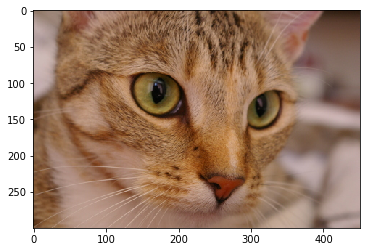

In [8]:
cat = data.chelsea()
plt.imshow(cat)

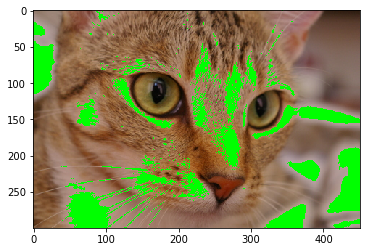

In [9]:
cat = data.chelsea()
reddish = cat[:,:,0] > 180
cat[reddish] = [0,255,0]
plt.imshow(cat)

In [10]:
cat.shape

(300, 451, 3)

In [11]:
reddish.shape

(300, 451)

In [12]:
import skimage.color

In [13]:
cat_orig = data.chelsea()
cat_hsv = skimage.color.convert_colorspace(cat_orig,"RGB","HSV")
cat_g = skimage.color.rgb2gray(cat_orig)

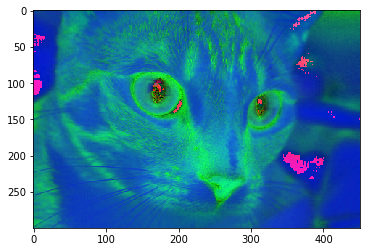

In [14]:
plt.imshow(cat_hsv, cmap = 'hsv')

In [15]:
cat_orig[50,60],cat_hsv[50,60],cat_g[50,60]

(array([160, 118,  78], dtype=uint8),
 array([0.08130081, 0.5125    , 0.62745098]),
 0.48643529411764713)

In [16]:
cat_orig[1:3,1:3,:]

array([[[145, 122, 106],
        [143, 120, 104]],

       [[147, 125, 111],
        [146, 122, 109]]], dtype=uint8)

In [17]:
cat_orig[1:3,1:3,:]/255

array([[[0.56862745, 0.47843137, 0.41568627],
        [0.56078431, 0.47058824, 0.40784314]],

       [[0.57647059, 0.49019608, 0.43529412],
        [0.57254902, 0.47843137, 0.42745098]]])

## Exercícios

1. Utilize duas imagens coloridas diferentes e refaça os processamentos que fizemos nos notebooks anteriores para explorar os conceitos de imagens coloridas. As imagens devem estar no espaço de cores RGB para estas operações.

    a. Transformações de Intensidade (equalização e normalização)


In [54]:
from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import unsharp_mask

img_ast = data.astronaut()

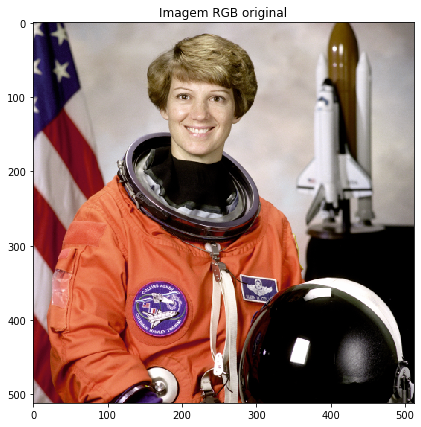

In [21]:
fig = plt.figure(figsize=(14, 7))
plt.imshow(img_ast), plt.title("Imagem RGB original")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c00ef0c588>,
 Text(0.5, 1.0, 'Imagem normalizada'))

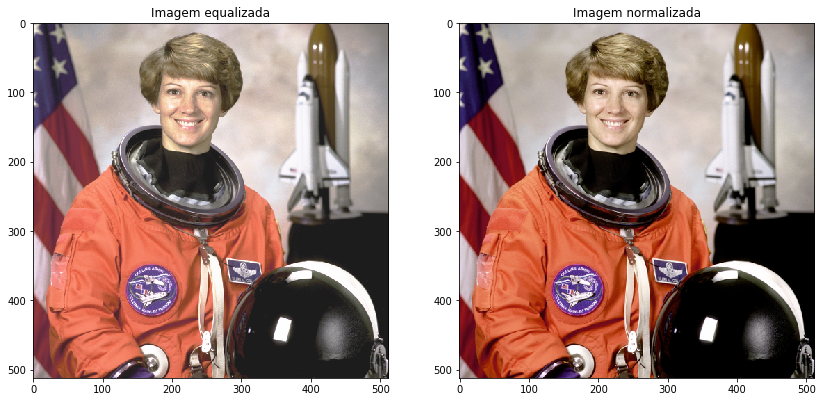

In [42]:
img_ast_eq = exposure.equalize_hist(img_ast)

img_ast_norm = img_ast.copy()

img_ast_norm = img_ast_norm / 255

fig = plt.figure(figsize=(14, 7))

plt.subplot(121),plt.imshow(img_ast_eq), plt.title("Imagem equalizada")

plt.subplot(122),plt.imshow(img_ast_norm), plt.title("Imagem normalizada")


(<matplotlib.image.AxesImage at 0x1c00eeb7da0>,
 Text(0.5, 1.0, 'Imagem RGB original'))

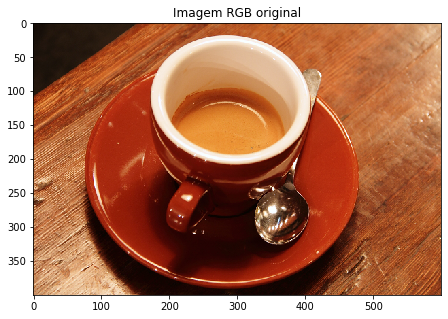

In [43]:
img_cf = data.coffee()
fig = plt.figure(figsize=(14, 5))
plt.imshow(img_cf), plt.title("Imagem RGB original")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c00f122978>,
 Text(0.5, 1.0, 'Imagem normalizada'))

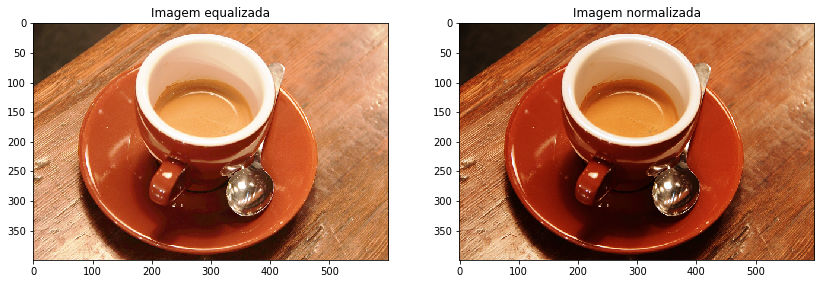

In [44]:
img_cf_eq = exposure.equalize_hist(img_cf)

img_cf_norm = img_cf.copy()

img_cf_norm = img_cf_norm / 255

fig = plt.figure(figsize=(14, 7))

plt.subplot(121),plt.imshow(img_cf_eq), plt.title("Imagem equalizada")

plt.subplot(122),plt.imshow(img_cf_norm), plt.title("Imagem normalizada")

    b. Filtros Espaciais (filtro de suavização e de aguçamento)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c0155966d8>,
 Text(0.5, 1.0, 'Imagem aguçada'))

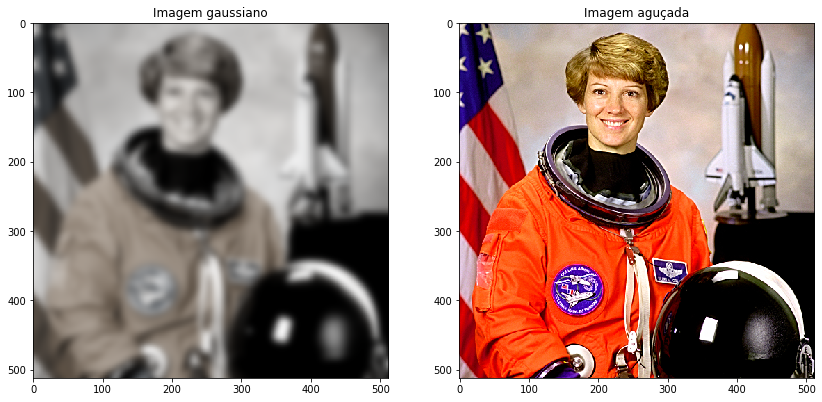

In [60]:
ast_gaus = gaussian(img_ast,sigma=5,multichannel=False)

aust_sharp = unsharp_mask(img_ast, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(ast_gaus), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(aust_sharp), plt.title("Imagem aguçada")

(<matplotlib.axes._subplots.AxesSubplot at 0x1c01b3ab2b0>,
 Text(0.5, 1.0, 'Imagem aguçada'))

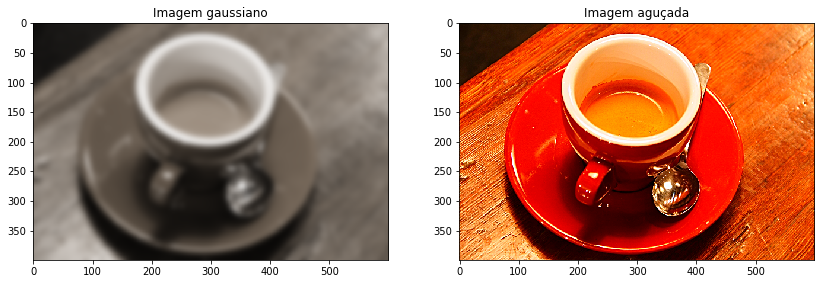

In [61]:
cf_gaus = gaussian(img_cf,sigma=5,multichannel=False)

cf_sharp = unsharp_mask(img_cf, radius=2, amount=1)

fig = plt.figure(figsize=(14, 7))
plt.subplot(121),plt.imshow(cf_gaus), plt.title("Imagem gaussiano")
plt.subplot(122),plt.imshow(cf_sharp), plt.title("Imagem aguçada")

    c. Filtros de Frequência (filtro passa baixa Butterworth e filtro passa-alta Gaussiano)
    
    Para cada processamento, documente os resultados obtidos, indicando se são coerentes ou não.

In [66]:
def butter2d_lp(shape, f, n, pxd=1): 
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis]) 
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

In [83]:
from scipy import signal

f_ast = np.fft.fft2(np.fft.fftshift(img_ast))


b, a = signal.butter(5, f_ast[:,:,0] , 'low')

img_back = np.abs(np.fft.fftshift(np.fft.ifft2(f_ast_b)))

plt.imshow(img_back)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

2. Utilize a função `skimage.color.convert_colorspace` e explore os processamentos nos espaços de cor "RGB" e "HSV". Repita os processamentos da questão 1.


3. Compare os resultados dos processamentos feitos no espaço de cor 'RGB' e 'HSV' e com as imagens convertidas para *nível de cinza*. Explique os resultados obtidos.

### Exercício de implementação

Implemente uma função de conversão de espaço de cor RGB para HSV conforme apresentado no livro texto (Gonzalez & Woods, capítulo 6.) Compare (demonstre) o resultado da sua função com as funções da biblioteca `skimage.color.convert_colorspace`

In [9]:
import numpy as np
from skimage import io
import math
from skimage import color
import matplotlib.pyplot as plt

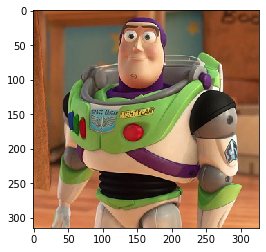

In [11]:
img = io.imread('buzz.jpg')

plt.imshow(img)

In [83]:
def calcular_h(r, g, b):

    h = r.copy()

    for x in range (len(r)):
        for y in range (len(r[0])):
            numerador = (((r[x][y] - g[x][y]) + (r[x][y] - b[x][y])) * 0.5) 
            denominador = (((r[x][y] - g[x][y]) ** 2) + ((r[x][y] - b[x][y]) * (g[x][y] - b[x][y]))) ** 0.5
            
            h[x][y] = math.acos(numerador / (denominador + 0.0001))
            
            if b[x][y] > g[x][y]:
                h[x][y] = 360 - h[x][y]
            
            h[x][y] = h[x][y] / 360
                
    return h
            

def calcular_s(r, g, b):
    minimo = np.minimum(np.minimum(r, g), b)
    s = 1 - (3 / (r + g + b + 0.001)) * minimo
    return s

def calcular_i(r, g, b):
    return np.divide(b + g + r, 3)

def transformar_hsi(rgb):
    
    #normalizando os valores para entre 0 e 1
    rgb2 = np.float32(rgb)/255
    
    red = rgb2[:,:,0].copy()
    green = rgb2[:,:,1].copy()
    blue = rgb2[:,:,2].copy()
    
    hsi = rgb2.copy()
    hsi[:,:,0] = calcular_h(red, green, blue)
    hsi[:,:,1] = calcular_s(red, green, blue)
    hsi[:,:,2] = calcular_i(red, green, blue)
    
    
    return hsi

[0.00112183 0.62140954 0.2379085 ]


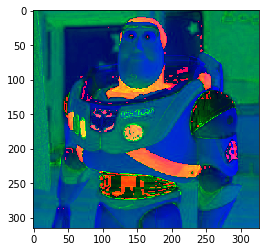

In [84]:
hsv = transformar_hsi(img)
print(hsv[0,0])
plt.imshow(hsv,  cmap="hsv")

[0.06584362 0.77884615 0.40784314]


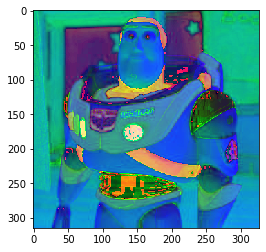

In [57]:
image_hsv = color.rgb2hsv(img)
print(image_hsv[0,0])
plt.imshow(image_hsv, cmap="hsv")